# EDA Work :  `คนไทยอ่านหนังสือปีละ 8 บรรทัด`

* จัดทำโดย นางสาว ศิริเลิศ ศรีประโมทย์ รหัส 6241213926
* วิชา Business Intelligence System 2602454 

---

## อ้างอิงจาก
* รายงานในครั้งนี้อ้างอิงจากข้อมูล ในปี พ.ศ.2558 และ พ.ศ.2561 เท่านั้น 
* https://github.com/siripramote/edawork
* www.nso.go.th/sites/2014/Pages/สำรวจ/ด้านสังคม/การศึกษาศาสนาและวัฒนธรรม/การอ่านหนังสือของประชากร.aspx
* https://iovs.arvojournals.org/article.aspx?articleid=2166061
* https://www.fonts.com/content/learning/fontology/level-2/text-typography/length-column-width

---

In [372]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [373]:
print(f'pandas version ={pd.__version__}') 
pd.Timestamp.now()

pandas version =1.3.5


Timestamp('2022-02-23 00:03:24.856631')

# ข้อมูลจำนวนประชากรอายุตั้งแต่ 6 ปีขึ้นไปที่อ่านหนังสือนอกเวลาเรียน/นอกเวลาทำงาน จำแนกตามเวลาที่ใช้อ่านเฉลี่ยต่อวัน เพศ พ.ศ.2558 และ พ.ศ. 2561 
---

# ข้อมูลของปี พ.ศ. 2558 โดยข้อมูลของคอลัมน์ duration หมายถึง (ชั่วโมง : นาที)

* read data from github

In [374]:
url = 'https://github.com/siripramote/edawork/raw/main/duration_on_reading58.xlsx'
dftime58= pd.read_excel(url,  skiprows=7, skipfooter=75)
dftime58

,ทั่วราชอาณาจักร,48408567,Unnamed: 2,23923889,24484679,Unnamed: 5,23054953,25353614,Unnamed: 8,Whole kingdom
0,0:00 - 0:29,14184840,NaN,7298745,6886095,NaN,4924755,9260085,NaN,Less than 0:30
1,0:30 - 0:59,11808548,NaN,5849354,5959194,NaN,5268554,6539993,NaN,0:30 - 0:59
2,1:00 - 1:59,11620655,NaN,5713114,5907541,NaN,6206105,5414550,NaN,1:00 - 1:59
3,2:00 - 2:59,5828753,NaN,2742194,3086559,NaN,3611041,2217712,NaN,2:00 - 2:59
4,3:00 - 3:59,2431413,NaN,1121203,1310210,NaN,1543874,887539,NaN,3:00 - 3:59
5,4:00 - 4:59,831683,NaN,365861,465822,NaN,532547,299136,NaN,4:00 - 4:59
6,5:00 - 5:59,470746,NaN,213527,257219,NaN,313849,156898,NaN,5:00 - 5:59
7,> 6:00,376594,NaN,164528,212067,NaN,207748,168846,NaN,6:00 and over
8,unknown,855335,NaN,455364,399971,NaN,446480,408855,NaN,Unknown


In [375]:
dftime58= dftime58.drop(columns=[48408567,'Unnamed: 2','Unnamed: 5',23054953,25353614,'Unnamed: 8','Whole kingdom'])
dftime58

,ทั่วราชอาณาจักร,23923889,24484679
0,0:00 - 0:29,7298745,6886095
1,0:30 - 0:59,5849354,5959194
2,1:00 - 1:59,5713114,5907541
3,2:00 - 2:59,2742194,3086559
4,3:00 - 3:59,1121203,1310210
5,4:00 - 4:59,365861,465822
6,5:00 - 5:59,213527,257219
7,> 6:00,164528,212067
8,unknown,455364,399971


In [376]:
dftime58.columns=['duration','men58', 'women58']

In [377]:
dft58 = dftime58
dft58

,duration,men58,women58
0,0:00 - 0:29,7298745,6886095
1,0:30 - 0:59,5849354,5959194
2,1:00 - 1:59,5713114,5907541
3,2:00 - 2:59,2742194,3086559
4,3:00 - 3:59,1121203,1310210
5,4:00 - 4:59,365861,465822
6,5:00 - 5:59,213527,257219
7,> 6:00,164528,212067
8,unknown,455364,399971


* กำหนด index 

In [378]:
df58 = dftime58.set_index('duration')

In [379]:
df58.index

Index(['0:00 - 0:29', '0:30 - 0:59', '1:00 - 1:59', '2:00 - 2:59',
       '3:00 - 3:59', '4:00 - 4:59', '5:00 - 5:59', '> 6:00', 'unknown'],
      dtype='object', name='duration')

In [380]:
df58

,men58,women58
duration,,
0:00 - 0:29,7298745,6886095
0:30 - 0:59,5849354,5959194
1:00 - 1:59,5713114,5907541
2:00 - 2:59,2742194,3086559
3:00 - 3:59,1121203,1310210
4:00 - 4:59,365861,465822
5:00 - 5:59,213527,257219
> 6:00,164528,212067
unknown,455364,399971


## รูปภาพที่ 1 : กราฟแสดงจำนวนประชากรอายุตั้งแต่ 6 ปี ขึ้นไปที่อ่านหนังสือแบ่งตาม เวลาที่ใช้อ่านเฉลี่ยต่อวันและ เพศ ของปีพ.ศ. 2558

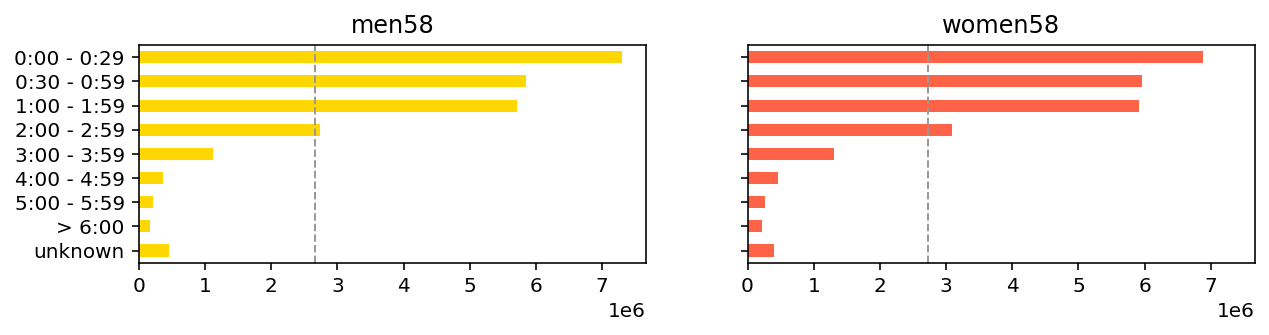

In [381]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10, 2))
color = ['gold', 'tomato']
sex = ['men58','women58']
Time = ['unknown','> 6:00', '5:00 - 5:59','4:00 - 4:59' , '3:00 - 3:59','2:00 - 2:59', '1:00 - 1:59', '0:30 - 0:59', '0:00 - 0:29']
for i in range(len(sex)):
    ax0=df58.loc[Time, sex[i]].plot(kind='barh', color=color[i], ax=ax[i], title=sex[i])
    ax0.axvline(df58[sex[i]].mean(), color=".6", linestyle="--", linewidth=1)
    ax0.set_ylabel('');

# ข้อมูลของปี พ.ศ. 2561 โดยข้อมูลของคอลัมน์ duration หมายถึง (ชั่วโมง : นาที)

* read data from github

In [382]:
url2 = 'https://github.com/siripramote/edawork/raw/main/duration_on_reading61.xlsx'
dftime61= pd.read_excel(url2,  skiprows=8, skipfooter=63)
dftime61

,ทั่วราชอาณาจักร,49682119,Unnamed: 2,24423072,25259047,Unnamed: 5,23586433,26095686,Unnamed: 8,Whole kingdom
0,0:00 - 0:29,13076608,NaN,6651237,6425371,NaN,4662810,8413797,NaN,Less than 0:30
1,0:30 - 0:59,8292383,NaN,4043229,4249154,NaN,3634650,4657733,NaN,0:30 - 0:59
2,1:00 - 1:59,13690537,NaN,6727502,6963035,NaN,7093484,6597053,NaN,1:00 - 1:59
3,2:00 - 2:59,7627776,NaN,3644894,3982882,NaN,4234273,3393503,NaN,2:00 - 2:59
4,3:00 - 3:59,3612182,NaN,1765075,1847107,NaN,2001999,1610183,NaN,3:00 - 3:59
5,4:00 - 4:59,1492832,NaN,737299,755532,NaN,876997,615834,NaN,4:00 - 4:59
6,5:00 - 5:59,837651,NaN,380983,456668,NaN,502546,335105,NaN,5:00 - 5:59
7,> 6:00,667797,NaN,278020,389777,NaN,393631,274166,NaN,6:00 and over
8,unknown,384354,NaN,194833,189521,NaN,186043,198311,NaN,Unknown


In [383]:
dftime61= dftime61.drop(columns=[49682119,'Unnamed: 2','Unnamed: 5',23586433,26095686,'Unnamed: 8','Whole kingdom'])

In [384]:
dftime61.columns=['duration','men61', 'women61' ]
dftime61

,duration,men61,women61
0,0:00 - 0:29,6651237,6425371
1,0:30 - 0:59,4043229,4249154
2,1:00 - 1:59,6727502,6963035
3,2:00 - 2:59,3644894,3982882
4,3:00 - 3:59,1765075,1847107
5,4:00 - 4:59,737299,755532
6,5:00 - 5:59,380983,456668
7,> 6:00,278020,389777
8,unknown,194833,189521


In [385]:
dft61 = dftime61
dft58['total58'] = dft58.men58 +dft58.women58
dft61['total61'] = dft61.men61 +dft61.women61


* กำหนด index 

In [386]:
df61=dftime61.set_index('duration')

In [387]:
df61.index

Index(['0:00 - 0:29', '0:30 - 0:59', '1:00 - 1:59', '2:00 - 2:59',
       '3:00 - 3:59', '4:00 - 4:59', '5:00 - 5:59', '> 6:00', 'unknown'],
      dtype='object', name='duration')

In [388]:
df61

,men61,women61,total61
duration,,,
0:00 - 0:29,6651237,6425371,13076608
0:30 - 0:59,4043229,4249154,8292383
1:00 - 1:59,6727502,6963035,13690537
2:00 - 2:59,3644894,3982882,7627776
3:00 - 3:59,1765075,1847107,3612182
4:00 - 4:59,737299,755532,1492831
5:00 - 5:59,380983,456668,837651
> 6:00,278020,389777,667797
unknown,194833,189521,384354


## รูปภาพที่ 2 : กราฟแสดงจำนวนประชากรอายุตั้งแต่ 6 ปี ขึ้นไปที่อ่านหนังสือแบ่งตาม เวลาที่ใช้อ่านเฉลี่ยต่อวันและ เพศ ของปีพ.ศ. 2561

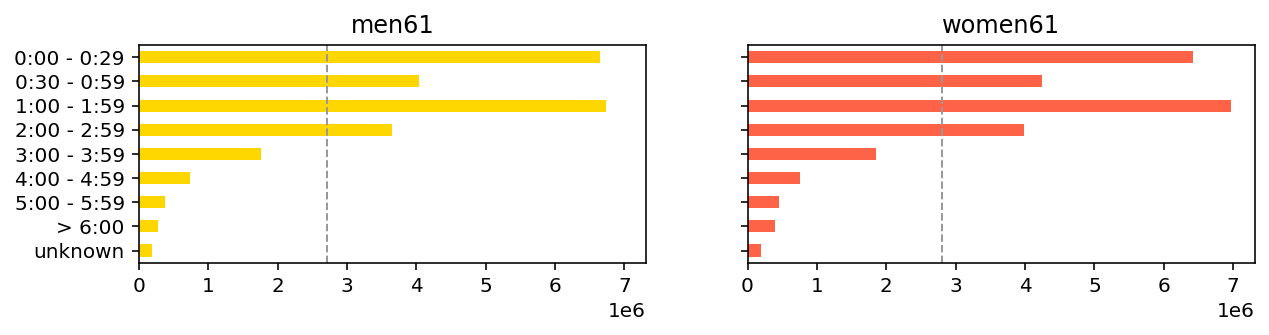

In [389]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10, 2))
color = ['gold', 'tomato']
sex = ['men61','women61']
Time = ['unknown','> 6:00' , '5:00 - 5:59','4:00 - 4:59' , '3:00 - 3:59','2:00 - 2:59', '1:00 - 1:59', '0:30 - 0:59', '0:00 - 0:29']
for i in range(len(sex)):
    ax0=df61.loc[Time, sex[i]].plot(kind='barh', color=color[i], ax=ax[i], title=sex[i])
    ax0.axvline(df61[sex[i]].mean(), color=".6", linestyle="--", linewidth=1)
    ax0.set_ylabel('');

* รวมตารางปีพ.ศ. 2558 และปีพ.ศ. 2561เข้าด้วยกัน

In [390]:
dftime=pd.concat([df58,df61], axis=1)
dftime

,men58,women58,men61,women61,total61
duration,,,,,
0:00 - 0:29,7298745,6886095,6651237,6425371,13076608
0:30 - 0:59,5849354,5959194,4043229,4249154,8292383
1:00 - 1:59,5713114,5907541,6727502,6963035,13690537
2:00 - 2:59,2742194,3086559,3644894,3982882,7627776
3:00 - 3:59,1121203,1310210,1765075,1847107,3612182
4:00 - 4:59,365861,465822,737299,755532,1492831
5:00 - 5:59,213527,257219,380983,456668,837651
> 6:00,164528,212067,278020,389777,667797
unknown,455364,399971,194833,189521,384354


* เพิ่มคอลัมน์ total ของแต่ละปี

In [391]:
dftime['total58'] = dftime.men58 +dftime.women58
dftime['total61'] = dftime.men61 +dftime.women61
dftime

,men58,women58,men61,women61,total61,total58
duration,,,,,,
0:00 - 0:29,7298745,6886095,6651237,6425371,13076608,14184840
0:30 - 0:59,5849354,5959194,4043229,4249154,8292383,11808548
1:00 - 1:59,5713114,5907541,6727502,6963035,13690537,11620655
2:00 - 2:59,2742194,3086559,3644894,3982882,7627776,5828753
3:00 - 3:59,1121203,1310210,1765075,1847107,3612182,2431413
4:00 - 4:59,365861,465822,737299,755532,1492831,831683
5:00 - 5:59,213527,257219,380983,456668,837651,470746
> 6:00,164528,212067,278020,389777,667797,376595
unknown,455364,399971,194833,189521,384354,855335


## รูปภาพที่ 3: กราฟแสดงจำนวนประชากรรวม ที่มีอายุตั้งแต่ 6 ปี ขึ้นไปที่อ่านหนังสือ ของปีพ.ศ.2558 และ พ.ศ.2561 และ กำหนดเส้นจำนวนประชากรรวมเฉลี่ยของแต่ละปี

In [392]:
avgtotal58=dftime.total58.mean()
avgtotal58

5378729.777777778

In [393]:
avgtotal61=dftime.total61.mean()
avgtotal61

5520235.444444444

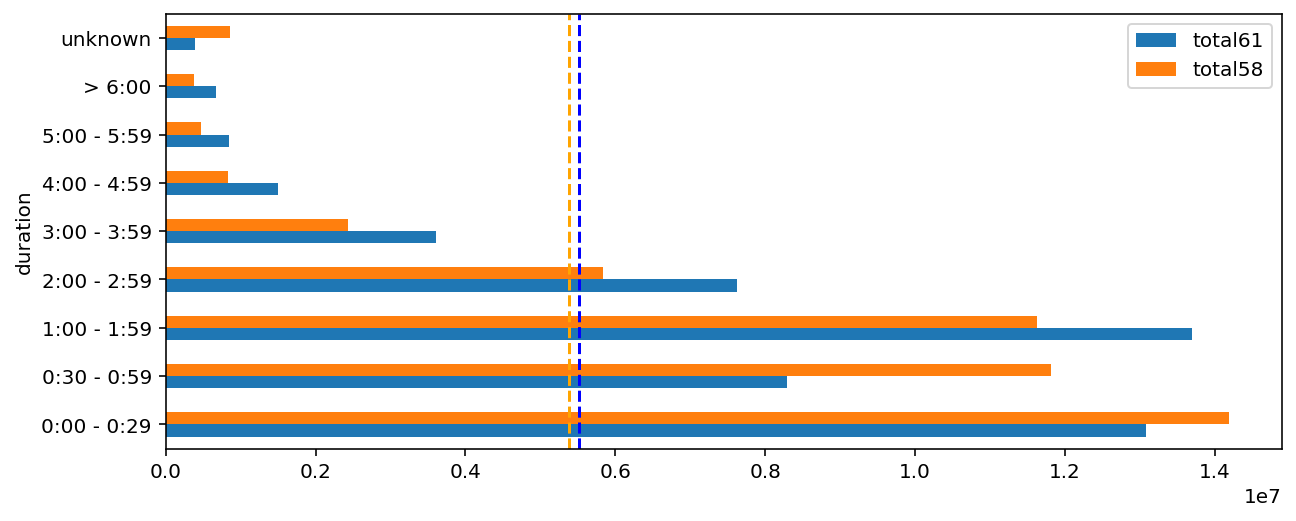

In [394]:
dftime[['total61','total58']].plot(kind='barh', figsize=(10, 4));
plt.axvline(x=avgtotal61, linestyle="--",color='blue')
plt.axvline(x=avgtotal58, linestyle="--", color='orange')

### จากรูปภาพที่ 3 ข้างต้น จะเห็นได้ว่า คนไทยใช้เวลาในการอ่านหนังสือมากที่สุด คือ 
* ในปีพ.ศ. 2558 ประมาณ 0:00 - 0.29 หรือในช่วง 30 นาทีแรก
* ในปีพ.ศ. 2561 ประมาณ 1:00-1:59 หรือในช่วง 1-2 ชั่วโมง
### และมีค่าเฉลี่ยของจำนวนคนไทยที่อ่านหนังสือในทุกระยะเวลา คือ 
* ในปีพ.ศ. 2558 ประมาณ 5,378,730 คน
* ในปีพ.ศ. 2561 ประมาณ 5,520,235 คน 
### ซึ่งทำให้เห็นว่า คนไทยอ่านและใช้เวลาในการหนังสือเพิ่มขึ้นจากปี พ.ศ. 2558 เมื่อเทียบกับปี พ.ศ. 2561

---
# คำนวณจำนวนคำในการอ่านภาษาอังกฤษภายใน1นาที โดยใช้จำนวน 228 คำ/นาที และคำนวณจำนวนคำต่อ1บรรทัดของภาษาอังกฤษ โดยใช้จำนวน 12 คำ/บรรทัด    เพื่อศึกษาว่าจำนวนของคนไทยที่อ่านหนังสือในแต่ละช่วงเวลาสามารถอ่านได้กี่คำและกี่บรรทัด
* อ้างอิงจาก https://iovs.arvojournals.org/article.aspx?articleid=2166061
* อ้างอิงจาก https://www.fonts.com/content/learning/fontology/level-2/text-typography/length-column-width
* ใช้ข้อมูล column duration ตั้งแต่ 0:00 -5:59 

In [395]:
dft58

,duration,men58,women58,total58
0,0:00 - 0:29,7298745,6886095,14184840
1,0:30 - 0:59,5849354,5959194,11808548
2,1:00 - 1:59,5713114,5907541,11620655
3,2:00 - 2:59,2742194,3086559,5828753
4,3:00 - 3:59,1121203,1310210,2431413
5,4:00 - 4:59,365861,465822,831683
6,5:00 - 5:59,213527,257219,470746
7,> 6:00,164528,212067,376595
8,unknown,455364,399971,855335


In [396]:
# ดึงเอาระยะเวลาของแต่ละช่วงเวลามาคิดเป็น นาที โดยใช้ตัวเลขหลังสัญลักษณ์ - 
dm58=dft58.duration.str.split('-', expand=True)
dm58

,0,1
0,0:00,0:29
1,0:30,0:59
2,1:00,1:59
3,2:00,2:59
4,3:00,3:59
5,4:00,4:59
6,5:00,5:59
7,> 6:00,None
8,unknown,None


In [397]:
dh58=dm58[1].str.split(':',expand=True).astype(float)
dh58

,0,1
0,0.0,29.0
1,0.0,59.0
2,1.0,59.0
3,2.0,59.0
4,3.0,59.0
5,4.0,59.0
6,5.0,59.0
7,NaN,NaN
8,NaN,NaN


In [398]:
dh58.columns=['hours58','minutes58']

In [399]:
dh58['time']=(dh58.hours58 * 60)+dh58.minutes58

In [400]:
dhcal=pd.concat([dft58.duration,dft58.total58,dft61.total61,dh58.time], axis=1)
dhcal

,duration,total58,total61,time
0,0:00 - 0:29,14184840,13076608,29.0
1,0:30 - 0:59,11808548,8292383,59.0
2,1:00 - 1:59,11620655,13690537,119.0
3,2:00 - 2:59,5828753,7627776,179.0
4,3:00 - 3:59,2431413,3612182,239.0
5,4:00 - 4:59,831683,1492831,299.0
6,5:00 - 5:59,470746,837651,359.0
7,> 6:00,376595,667797,NaN
8,unknown,855335,384354,NaN


In [401]:
# column 'word' หมายถึง เวลา(นาที) * 228, (228=ค่าเฉลี่ยของจำนวนคำในการอ่านภาษาอังกฤษต่อ1นาที)
# column 'line' หมายถึง จำนวนคำต่อ1บรรทัด /12, (12=ค่าเฉลี่ยของจำนวนคำต่อ1บรรทัด)

dhcal['word']=dhcal.time * 228
dhcal['line']=dhcal.word / 12

In [402]:
co_list = dhcal['duration']
@interact(com= co_list)
def filter_column(com):
    return dhcal[dhcal['duration']== com]

interactive(children=(Dropdown(description='com', options=('0:00 - 0:29', '0:30 - 0:59', '1:00 - 1:59', '2:00 …

In [403]:
dhcal

,duration,total58,total61,time,word,line
0,0:00 - 0:29,14184840,13076608,29.0,6612.0,551.0
1,0:30 - 0:59,11808548,8292383,59.0,13452.0,1121.0
2,1:00 - 1:59,11620655,13690537,119.0,27132.0,2261.0
3,2:00 - 2:59,5828753,7627776,179.0,40812.0,3401.0
4,3:00 - 3:59,2431413,3612182,239.0,54492.0,4541.0
5,4:00 - 4:59,831683,1492831,299.0,68172.0,5681.0
6,5:00 - 5:59,470746,837651,359.0,81852.0,6821.0
7,> 6:00,376595,667797,NaN,NaN,NaN
8,unknown,855335,384354,NaN,NaN,NaN


### จากตาราง dhcal ข้างต้นสามารถสรุปได้ว่า จำนวนประชากรทั้งหมดจากปีพ.ศ.2558 และ พ.ศ. 2561 ที่ใช้เวลาในการอ่านหนังสือในแต่ละระยะเวลา เมื่อเปรียบเทียบดูแล้ว ปรากฏว่า ไม่มีช่วงระยะเวลาไหนที่มีจำนวนบรรทัดน้อยกว่า 8 บรรทัดเลย ทั้งนี้ค่าการอ่านจำนวนคำภายใน1นาที และค่าจำนวนคำต่อ1บรรทัด ทางผู้จัดทำอ้างอิงจากภาษาอังกฤษ จึงไม่สามารถสรุปข้อมูลได้ เพราะจากพาดหัวข่าวทางผู้เขียนข่าวไม่ได้บอกว่าใช้หลักเกณฑ์ของภาษาใดมากล่าวอ้างว่า คนไทยอ่านหนังสือปีละ 8 บรรทัด และถึงแม้จะไม่สามารถสรุปได้ว่าข่าวที่กล่าวอ้างไว้นั้นเป็นความจริงหรือไม่ แต่จากการวิเคราะห์จะเห็นได้ว่าคนไทยนั้นก็ใช้เวลาในการอ่านหนังสือมากพอสมควร